In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
prefetchers = ['base', 'pythia', 'nextline', 'strided']
prefetchers_no_base = ['pythia', 'nextline', 'strided']

In [120]:

# Assuming your data is in a CSV format, load it using pandas
df = pd.read_csv("./output/results.csv")

# We will now split the data based on the binary
df_sorted = df.sort_values(by=['binary', 'config'])

<Figure size 800x600 with 0 Axes>

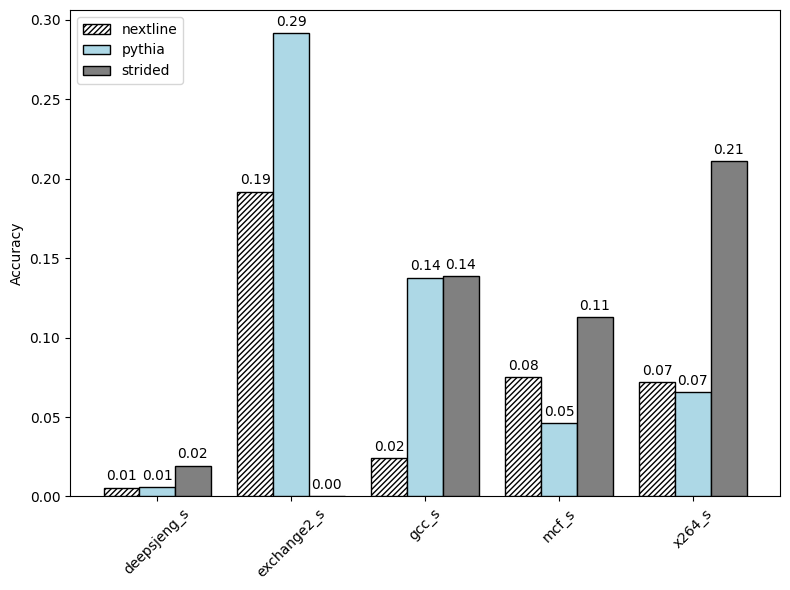

/tmp/ipykernel_17371/757790943.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  coverage_ax.set_yticklabels(coverage_ax.get_yticklabels(), fontsize=18)


<Figure size 1400x600 with 0 Axes>

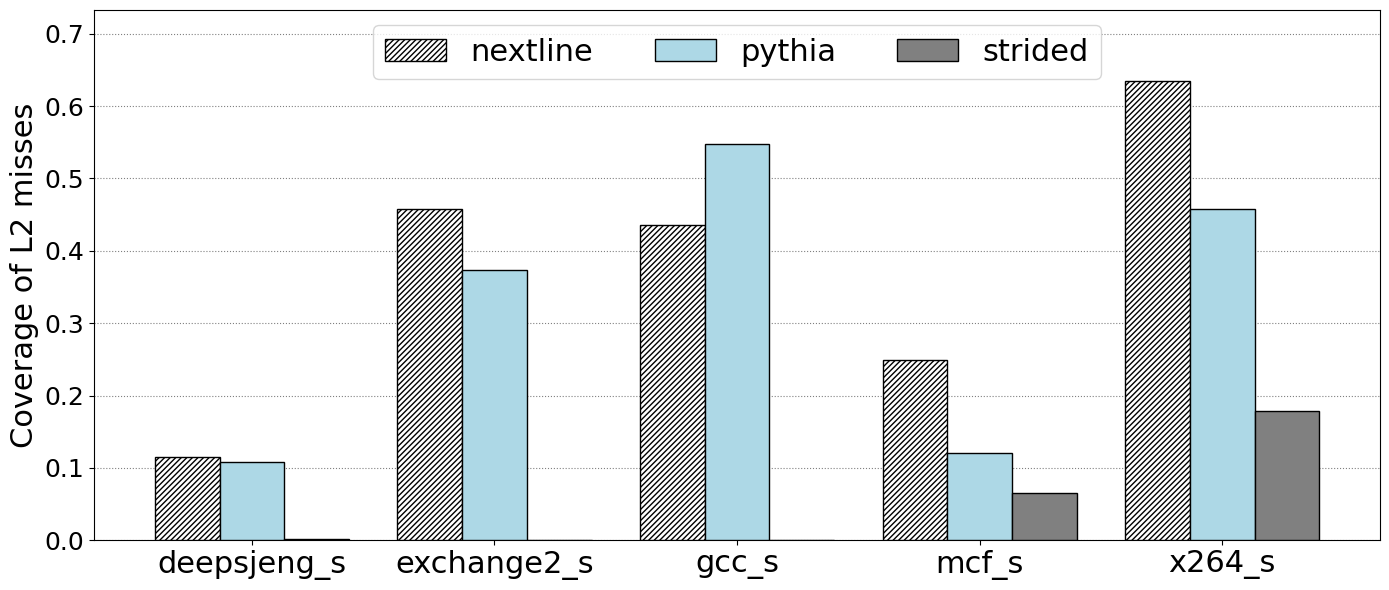

In [121]:
# Filter the data for accuracy and coverage metrics
accuracy_data = df_sorted[df_sorted['metric'] == 'system.l2.prefetcher.accuracy']
coverage_data = df_sorted[df_sorted['metric'] == 'system.l2.prefetcher.coverage']

# Merge the accuracy and coverage data on binary and config
merged_data = pd.merge(
    accuracy_data[['binary', 'config', 'value']],
    coverage_data[['binary', 'config', 'value']],
    on=['binary', 'config'],
    suffixes=('_accuracy', '_coverage')
)

merged_data = merged_data[merged_data['config'].isin(prefetchers_no_base)]
# Create a figure for the accuracy plot
plt.figure(figsize=(8,6))
accuracy_ax = merged_data.pivot(index='binary', columns='config', values='value_accuracy').plot(
    kind='bar', figsize=(8, 6), width=0.8, color=['white', 'lightblue', 'gray'], edgecolor="black", zorder=99
)

# Apply hatching to make the bars striped (for print-friendly design)
for patch in accuracy_ax.patches:
    if patch.get_facecolor() == (1.0, 1.0, 1.0, 1.0):  # Check if the bar is white (RGB = 1.0, 1.0, 1.0)
        patch.set_hatch('//////')  # Add diagonal stripes to white bars

for container in accuracy_ax.containers:
    accuracy_ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

# Customize the accuracy plot
accuracy_ax.set_ylabel('Accuracy')
accuracy_ax.set_xlabel("")
accuracy_ax.legend(loc='upper left', fontsize=10)
accuracy_ax.set_xticklabels(accuracy_ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig(f"./graphs/accuracy.png", bbox_inches='tight')
plt.show()

# Create a figure for the coverage plot
plt.figure(figsize=(14, 6))
coverage_ax = merged_data.pivot(index='binary', columns='config', values='value_coverage').plot(
    kind='bar', figsize=(14, 6), width=0.8, color=['white', 'lightblue', 'gray'], edgecolor="black", zorder=99
)

# Apply hatching to make the bars striped (for print-friendly design)
for patch in coverage_ax.patches:
    if patch.get_facecolor() == (1.0, 1.0, 1.0, 1.0):  # Check if the bar is white (RGB = 1.0, 1.0, 1.0)
        patch.set_hatch('//////')  # Add diagonal stripes to white bars

# for container in coverage_ax.containers:
#     coverage_ax.bar_label(container, fmt='%.2f', fontsize=14, padding=3)

# Customize the coverage plot
coverage_ax.set_ylim((coverage_ax.get_ylim()[0], coverage_ax.get_ylim()[1] * 1.1))
coverage_ax.set_yticklabels(coverage_ax.get_yticklabels(), fontsize=18)
coverage_ax.set_ylabel('Coverage of L2 misses', fontsize=22)
coverage_ax.set_xlabel("")
legend = coverage_ax.legend(loc='upper center', fontsize=22, ncols=3)
legend.set_zorder(100)
coverage_ax.set_xticklabels(coverage_ax.get_xticklabels(), rotation=0, fontsize=22)
plt.grid(True, which="both", axis="y", linestyle=":", color="grey", zorder=-1)
plt.tight_layout()
plt.savefig(f"./graphs/coverage.png", bbox_inches='tight')
plt.show()

['base', 'pythia', 'nextline', 'strided']
_nolegend_
_nolegend_
_nolegend_
_nolegend_
_nolegend_


<Figure size 1200x600 with 0 Axes>

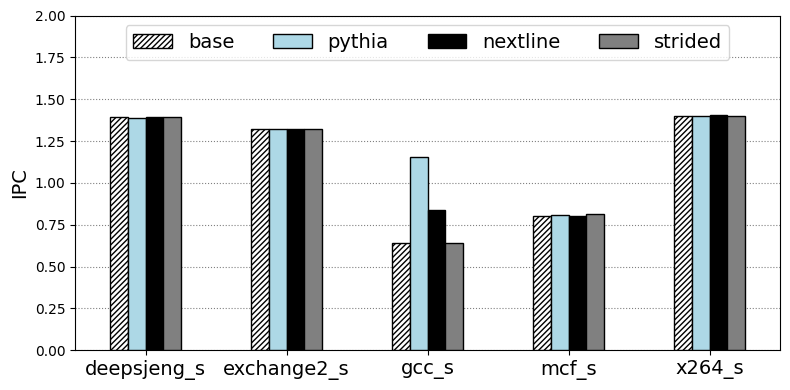

In [122]:
# Filter the data for IPC metric
ipc_data = df_sorted[df_sorted['metric'] == 'ipc']

# Pivot the data to have configurations as columns and binaries as rows
ipc_pivot_data = ipc_data.pivot(index='binary', columns='config', values='value')
ipc_pivot_data = ipc_pivot_data[prefetchers]
configs = prefetchers
print(configs)

# Divide the values by the noprefetcher value to calculate the percentage increase
ipc_pivot_data_percentage = ipc_pivot_data

plt.figure(figsize=(12, 6))

# Plot the percentage increase as a bar chart
ax = ipc_pivot_data_percentage.plot(kind='bar', figsize=(8, 4), color=['white', 'lightblue', 'black', 'gray'], label=configs, edgecolor="black", zorder=99)
# Apply hatching to the bars (striped bars for 'boprefetcher' and solid bars for 'tdtprefetcher')
for i, patch in enumerate(ax.patches):
    if patch.get_facecolor() == (1.0, 1.0, 1.0, 1.0):  # Check if the bar is white (RGB = 1.0, 1.0, 1.0)
        patch.set_hatch('//////')  # Add diagonal stripes to white bars
        print(patch.get_label())

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3, rotation=45)

# Customize the plot
plt.ylabel('IPC', fontsize=14)
plt.xlabel("")
plt.legend(loc='upper center', ncol=4, fontsize=14)
plt.grid(True, which='both', axis='y', linestyle=':', color='grey', zorder=-1)  # Dotted grid lines on y-axis
plt.xticks(rotation=0, fontsize=14)
plt.ylim(0, 2.0)
plt.tight_layout()
plt.savefig(f"./graphs/ipcs.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_17371/324771132.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prefetcher_data['value'] = pd.to_numeric(prefetcher_data['value'], errors='coerce')


[11.44578313 45.75424575 43.50189476 24.94033008 63.4352356 ]
[10.83678297 37.35600658 54.77998411 12.03906303 45.73205581]
[ 0.19440706  0.          0.05459276  6.50407303 17.91355946]


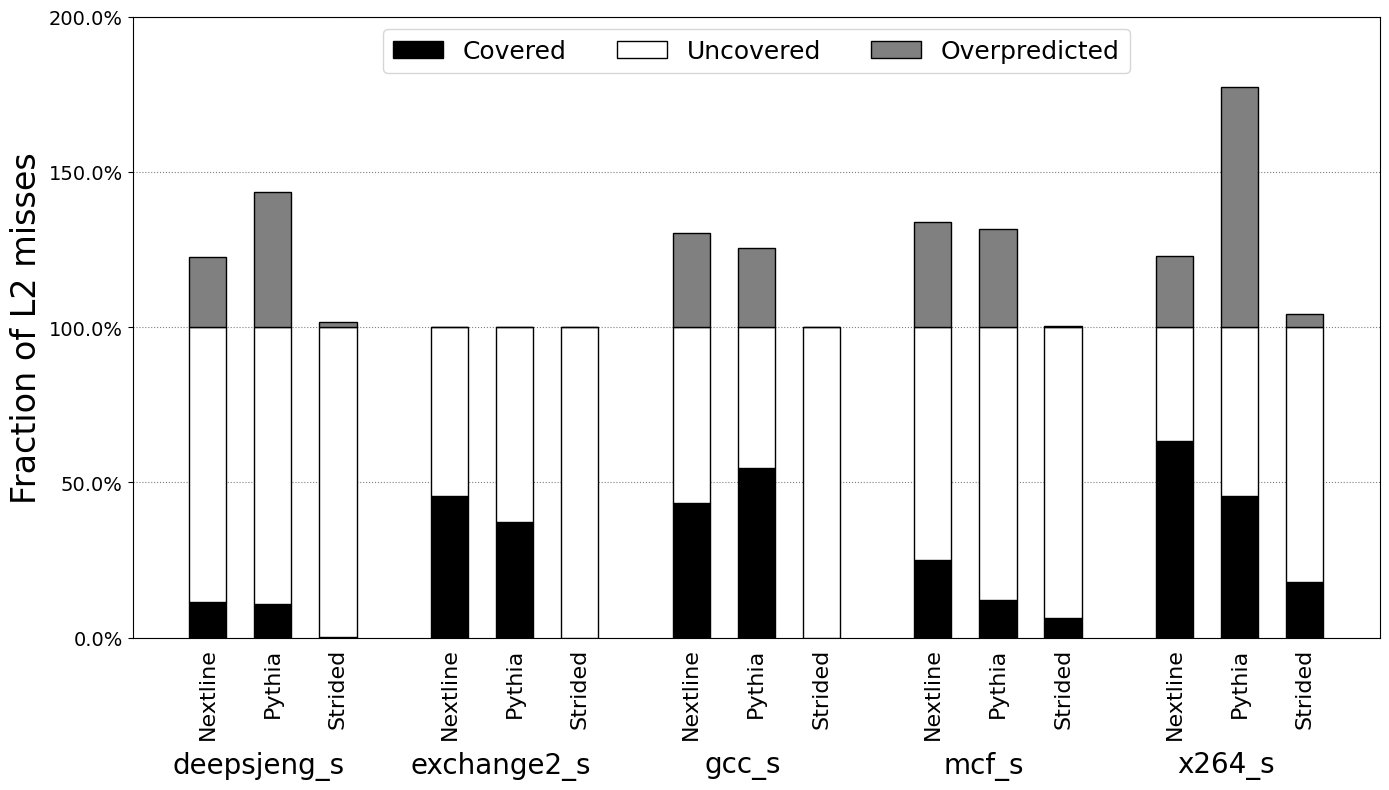

In [123]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

metrics = [
    'system.l2.prefetcher.pfUseful',
    'system.l2.prefetcher.demandMshrMisses', 
    'system.l2.prefetcher.pfUnused', 
]

prefetcher_data = df_sorted[df_sorted['metric'].isin(metrics)]

# Ensure the 'value' column is numeric
prefetcher_data['value'] = pd.to_numeric(prefetcher_data['value'], errors='coerce')

pivot_df = prefetcher_data.pivot_table(index=["binary", "config"], columns="metric", values="value", fill_value=0).reset_index()
metrics  = ["system.l2.prefetcher.pfUseful", "system.l2.prefetcher.demandMshrMisses", "system.l2.prefetcher.pfUnused"]
colors = {
    "system.l2.prefetcher.demandMshrMisses": "white",
    "system.l2.prefetcher.pfUseful": "black",
    "system.l2.prefetcher.pfUnused": "grey"
}

fig, ax = plt.subplots(figsize=(14, 8))
binaries = prefetcher_data['binary'].unique()
configs  = prefetcher_data['config'].unique()
configs  = [config for config in configs if config != 'base']
x = np.arange(len(binaries))

bar_width = 0.1
bar_spacing = 0.075
group_gap = 0.2         # Extra gap between binary groups

# Compute x-axis positions
group_width = len(configs) * (bar_width + bar_spacing) - bar_spacing
group_positions = np.arange(len(binaries)) * (group_width + group_gap)

# Store x-tick positions and labels
x_tick_positions = []
x_tick_labels = []
x_binary_positions = []
x_binary_labels = []

bars = {}  # To store bar handles for the legend
largest_bar = 0
for i, config in enumerate(configs):
    subset = pivot_df[pivot_df["config"] == config]
    
    # For each binary, extract the row corresponding to that binary and config.
    # We'll assume every binary has an entry for every config.
    values_by_binary = []
    for binary in binaries:
        row = subset[subset["binary"] == binary]
        if not row.empty:
            # For each metric, values will be retrieved later in the stacking loop.
            # Here, we just record that a row exists.
            values_by_binary.append(row)
        else:
            # If a particular binary doesn't have this config, create a dummy row with zeros.
            values_by_binary.append(pd.DataFrame({m: [0] for m in metrics}))
    
    # The x offset for the current config inside each group
    x_offsets = group_positions + i * (bar_width + bar_spacing)
    
    # Initialize bottom values for stacking
    bottom = np.zeros(len(binaries))

    # Normalize to pfUseful + MSHRmisses
    all_metric_values = np.array([[df[metric].values[0] if metric in df.columns else 0 for df in values_by_binary] for metric in metrics])
    useful_mshr = all_metric_values[0] + all_metric_values[1]
    all_metric_values_normalized = (all_metric_values / useful_mshr) * 100
    print(all_metric_values_normalized[0])
    
    for j, metric in enumerate(metrics):
        metric_values = [df[metric].values[0] if metric in df.columns else 0 for df in values_by_binary]
        metric_values = np.array(metric_values)
        # print(metric_values)

        bars[metric] = ax.bar(x_offsets, all_metric_values_normalized[j], width=bar_width,
               bottom=bottom, color=colors[metric], edgecolor="black", label=metric, zorder=99)
        
        bottom += all_metric_values_normalized[j]

    for bar in bottom:
        if bar > largest_bar:
            largest_bar = bar

    # Store positions and labels for config-level x-axis labels
    x_tick_positions.extend(x_offsets)
    x_tick_labels.extend([config] * len(binaries))


# Store positions and labels for binary-level x-axis labels
for i, binary in enumerate(binaries):
    x_binary_positions.append(group_positions[i] + group_width / 2 - (bar_width + bar_spacing)/2)
    x_binary_labels.append(binary)

# Set x-axis ticks for configs
ax.set_xticks(x_tick_positions)
ax.set_xticklabels([label.title() for label in x_tick_labels], rotation=90, fontsize=16)

# Add binary labels below the config labels
for pos, label in zip(x_binary_positions, x_binary_labels):
    ax.text(pos, -max(bottom) * 0.35, label, ha='center', va='top', fontsize=20)

# Labels and title
ax.set_ylabel("Fraction of L2 misses", fontsize=24)

y_labels = np.arange(0, 50 * np.round(largest_bar / 50) + 50, 50)
ax.set_yticks(y_labels)
y_labels = [str(l) + "%" for l in y_labels]
ax.set_yticklabels(y_labels, fontsize=14, rotation=0)

# Add legend
legend = ax.legend(bars.values(), ["Covered", "Uncovered", "Overpredicted"], loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1), fontsize=18)
legend.set_zorder(100)

# Move x-axis ticks lower
ax.tick_params(axis="x", which="both", bottom=False, top=False)

plt.grid(True, which='both', axis='y', linestyle=':', color='grey', zorder=-1)  # Dotted grid lines on y-axis
plt.tight_layout()
plt.savefig(f"./graphs/behavior.png", bbox_inches='tight')
plt.show()

<Figure size 800x200 with 0 Axes>

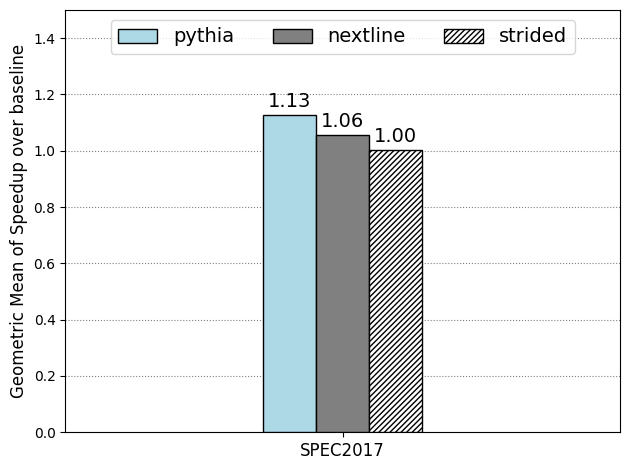

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate Harmonic Mean
def harmonic_mean(scores):
    scores = np.array(scores)
    if len(scores) == 0 or np.any(scores == 0):  
        return np.nan  # Avoid division by zero
    return len(scores) / np.sum(1 / scores)

def geomean(scores):
    mean = 1
    for val in scores:
        mean *= val
    return mean**(1/len(scores))

# Filter IPC data
ipc_data = df_sorted[df_sorted['metric'] == 'ipc']

# Initialize lists to store results
scores = [[] for _ in prefetchers if _ != 'base']
binaries = []

# Collect all scores first
for binary in ipc_data['binary'].unique():
    binary_ipc_data = ipc_data[ipc_data['binary'] == binary]
    baseline = binary_ipc_data[binary_ipc_data['config'] == 'base']['value'].values
    
    # Get baseline
    baseline = binary_ipc_data[binary_ipc_data['config'] == 'base']['value'].values
    if len(baseline) == 0:
        continue  # Skip if there is no baseline

    baseline_value = baseline[0]  # Assume one value for baseline
    
    # Compute speedups and store raw speedups for later computation
    for i, prefetcher in enumerate([prefetcher for prefetcher in prefetchers if prefetcher != 'base']):
        val = binary_ipc_data[binary_ipc_data['config'] == prefetcher]['value'].values
        speedup = val / baseline_value if len(val) > 0 else []
        scores[i].extend(speedup)
    
    # Store binary names
    binaries.append(binary)

# Compute harmonic means for all binaries together
score_means = [geomean(score) if score else float('nan') for score in scores]

# Create a DataFrame for comparison
harmonic_df = pd.DataFrame({
    'binary': ['SPEC2017'],
    **{prefetcher: [score_means[i]] for i, prefetcher in enumerate(prefetchers_no_base)}
})

# Plot comparison
plt.figure(figsize=(8, 2))
ax = harmonic_df.set_index('binary').plot(kind='bar', width=0.2, color=['lightblue', 'gray', 'white'], edgecolor="black", zorder=99)

# Apply hatching for better visualization
for patch in ax.patches:
    if patch.get_facecolor() == (1.0, 1.0, 1.0, 1.0):  # White bars
        patch.set_hatch('//////')  # Add diagonal stripes

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=14, padding=3)

# Customize plot
ax.set_xlabel("")
ax.set_ylabel('Geometric Mean of Speedup over baseline', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.legend(fontsize=14, ncols=3, loc="upper center")
plt.grid(True, which="both", axis="y", linestyle=":", color="grey", zorder=-1)
plt.xticks(rotation=0)
plt.ylim(0, 1.5)
plt.tight_layout()
plt.savefig("./graphs/geometric_mean.png", bbox_inches='tight')
plt.show()

[1.153178]


/tmp/ipykernel_17371/407447801.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


<Figure size 1200x600 with 0 Axes>

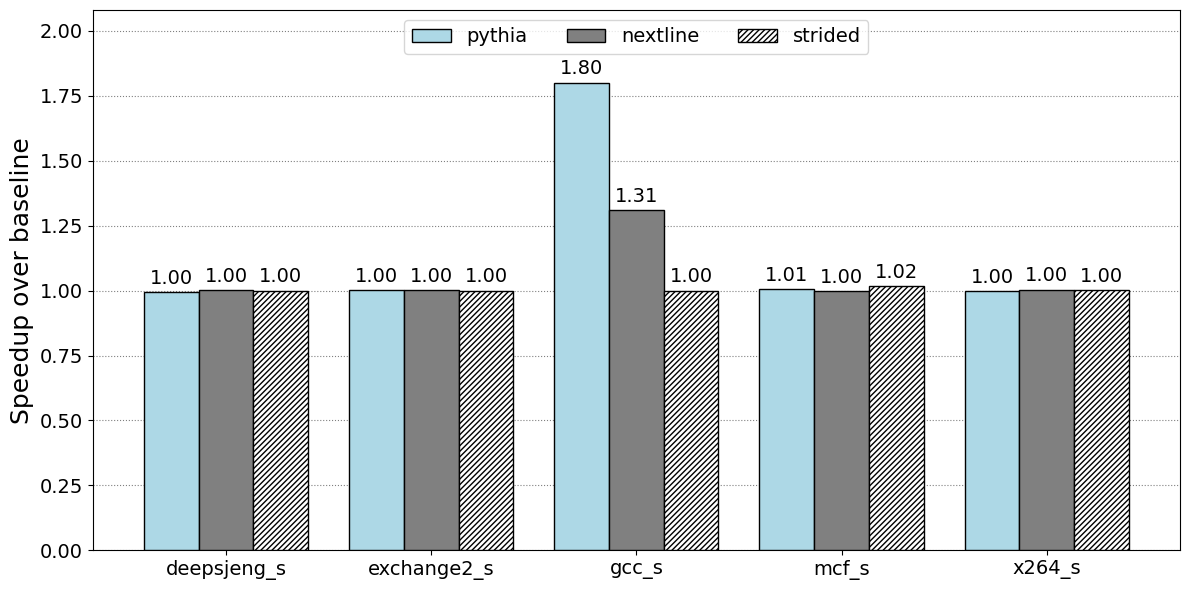

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter IPC data
ipc_data = df_sorted[df_sorted['metric'] == 'ipc']

# Initialize lists to store results
speedups_dict = [
    {} for _ in prefetchers_no_base
]

# Collect all scores first
for binary in ipc_data['binary'].unique():
    binary_ipc_data = ipc_data[ipc_data['binary'] == binary]
    
    # Get the value for noprefetcher config
    baseline_values = binary_ipc_data[binary_ipc_data['config'] == 'base']['value'].values
    if len(baseline_values) == 0:
        continue  # Skip if no baseline

    baseline_value = baseline_values[0]  # Assume one value for baseline
    
    # Get values for TDT and BOP prefetchers
    for i, prefetcher in enumerate(prefetchers_no_base):
        values = binary_ipc_data[binary_ipc_data['config'] == prefetcher]['value'].values
        speedup = values / baseline_value if len(values) > 0 else [np.nan]
        speedups_dict[i][binary] = np.mean(speedup)

    if (binary == "gcc_s"):
        print(binary_ipc_data[binary_ipc_data['config'] == 'pythia']['value'].values)

# Convert to DataFrame
speedup_df = pd.DataFrame({
    'binary': list(speedups_dict[0].keys()),
    **{prefetcher: list(speedups_dict[i].values()) for i, prefetcher in enumerate(prefetchers_no_base)}
})

# Plot speedups
plt.figure(figsize=(12, 6))
ax = speedup_df.set_index('binary').plot(kind='bar', width=0.8, figsize=(12, 6), color=['lightblue', 'gray', 'white'], edgecolor='black',  zorder=99)

# Apply hatching for better visualization
for patch in ax.patches:
    if patch.get_facecolor() == (1.0, 1.0, 1.0, 1.0):  # White bars
        patch.set_hatch('//////')  # Add diagonal stripes

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=14, padding=3)

# Customize plot
# ax.set_title(f'Speedup Comparison: {", ".join([n.title() for n in prefetchers_no_base][:-1])} and {prefetchers_no_base[-1].title()} Prefetchers', fontsize=14)
ax.set_ylabel('Speedup over baseline', fontsize=18)
ax.set_xlabel("")
ax.set_ylim((ax.get_ylim()[0], ax.get_ylim()[1]*1.1))
ax.legend(fontsize=14, ncols=3, loc="upper center")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
plt.grid(True, which="both", axis="y", linestyle=":", color="grey", zorder=-1)
plt.tight_layout()
plt.savefig("./graphs/speedup_comparison.png", bbox_inches='tight')
plt.show()

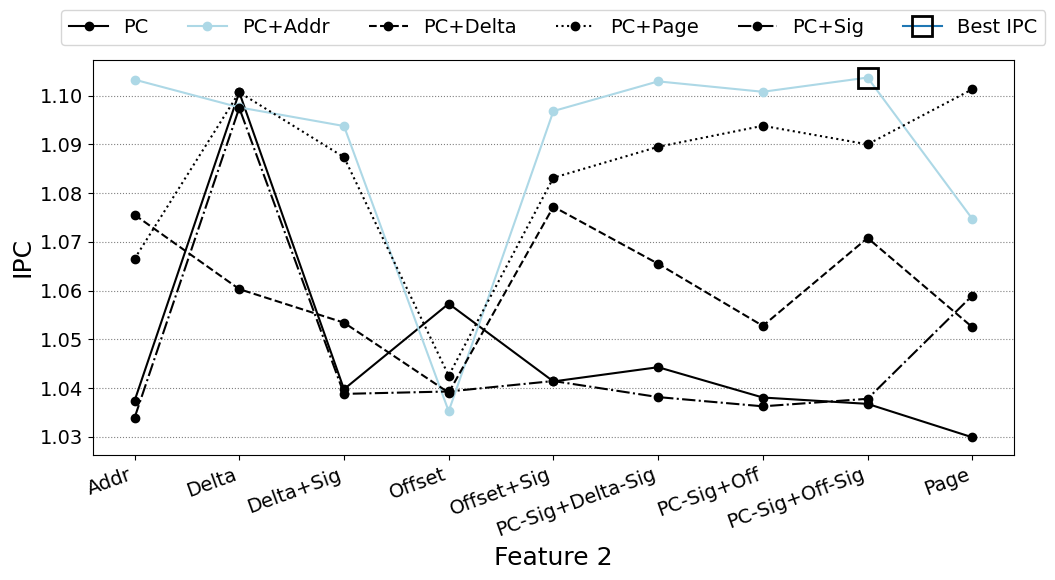

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define feature mapping as a dictionary
feature_map = {
    0: "PC", 1: "Offset", 2: "Delta", 3: "Addr", 4: "PC+Off",
    5: "PC+Addr", 6: "PC+Page", 7: "PC+Sig", 8: "Delta+Sig", 9: "Offset+Sig",
    10: "PC+Delta", 11: "PC+Off+Delta", 12: "Page", 13: "PC-Sig+Off",
    14: "PC-Sig+Off-Sig", 15: "PC-Sig+Delta", 16: "PC-Sig+Delta-Sig",
    17: "PC-Sig+Off-Sig+Delta-Sig", 18: "Off-Sig+PC", 19: "Delta-Sig+PC"
}

# Load the data
df = pd.read_csv("feature_results.csv", header=0, names=["Feature 0", "Feature 1", "IPC"])

# Replace numeric values with names
df["Feature 0"] = df["Feature 0"].map(feature_map)
df["Feature 1"] = df["Feature 1"].map(feature_map)

# Sort for correct line ordering
df = df.sort_values(by=["Feature 0", "Feature 1"])

# Identify the overall best IPC result
best_result = df.loc[df["IPC"].idxmax()]

# Identify the Feature 0 with the highest IPC
max_ipc_feature_0 = df.groupby("Feature 0")["IPC"].max().idxmax()

# Define colors and line styles
line_styles = ["-", "--", ":", "-."]  # Solid, dashed, dotted, dash-dot
color_map = {}
style_map = {}

i = 0  # Line style index
for feature in df["Feature 0"].unique():
    if feature == max_ipc_feature_0:
        color_map[feature] = "lightblue"
        style_map[feature] = "-"  # Solid for max IPC feature
    else:
        color_map[feature] = "black"  # All others in black/gray
        style_map[feature] = line_styles[i % len(line_styles)]  # Cycle through styles
        i += 1

# Plot
plt.figure(figsize=(11, 6))

# Loop through each unique value of Feature 0 and plot
for feature_0 in df["Feature 0"].unique():
    subset = df[df["Feature 0"] == feature_0]
    
    # Plot all points with circle markers
    plt.plot(
        subset["Feature 1"], subset["IPC"], 
        marker="o", 
        label=feature_0, 
        color=color_map[feature_0], 
        linestyle=style_map[feature_0]
    )

# Highlight the best IPC result by surrounding its dot with a square
plt.plot(
    best_result["Feature 1"], best_result["IPC"],
    marker="s", markersize=14, markeredgewidth=2, markerfacecolor="none",
    markeredgecolor="black", label="Best IPC"
)

# Labels and title
plt.xlabel("Feature 2", fontsize=18)
plt.ylabel("IPC", fontsize=18)

# Rotate x-axis labels for readability
plt.xticks(rotation=20, ha="right", fontsize=14)
plt.yticks(fontsize=14)

# Legend and grid
plt.legend(fontsize=14, loc="upper center", ncols=6, bbox_to_anchor=(0.5, 1.15)) # bbox_to_anchor=(1.0, 1.025),
plt.grid(True, which="both", axis="y", linestyle=":", color="grey", zorder=-1)

# Show plot
plt.tight_layout()
plt.savefig("./graphs/feature_explore.png", bbox_inches='tight')
plt.show()